In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Copy of msc_training_dataset.csv")
test = pd.read_csv("/content/drive/MyDrive/Copy of msc_testing_dataset.csv")

In [ ]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [ ]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(rf_reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, rf_predicted))

0.9984293468790486
170.42792792792793


In [ ]:
predicted = rf_reg.predict(test_X)

In [ ]:
predicted

array([ 5346.5,  7729.9, 11476.9,  8770. , 11079.4, 11484.7, 11745. ,
        6989.1,  7798. ,  5906.9,  9090.8,  8433.3,  7096.4, 11278.6,
        7323.6,  9483.4,  8906.5, 12763. ,  9898.2,  6983.1,  8911.7,
        7412.2,  7116.7,  4260. , 10029.8,  7358.8,  7354.5,  9047.4,
        6829.8,  9278.1,  6613.2, 10052.9, 10549.2,  8286.5,  7664.2,
       10189.1,  9263.7, 11075.3,  9389.2, 13263.2,  6630.7,  5287.5,
        9844. ,  8892.2, 11630.9,  6114.8,  4359.6, 11421.6,  9570.2,
        5545.5, 11585.4, 10580.8,  4841.2,  7898.3, 13628.6,  9755.9,
        6186.3,  8462.2, 10074. ,  7791.4,  7825.8, 13495.4,  7316. ,
        8455. , 12567.1,  7133.3, 11293.2, 10588. ,  9983.7,  5515.4,
        8163.8, 12062.2,  4173.7,  6210.4,  9563.2,  8677.7,  6897.6,
       11208.1, 10961.6, 10675.1,  8833.3,  7448.9, 12052.2,  8122.4,
       11690.5,  6198.9,  8761.8,  8245.9,  6893.8,  8261.7,  7618.7,
       12111. , 11713.4,  7877.4,  6613.2, 11068.2, 11130. ,  8292. ,
        9197. ,  735

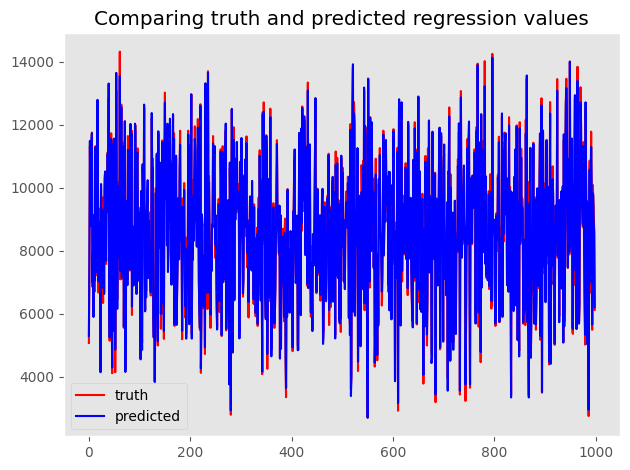

In [ ]:
make_plot(test_Y, rf_predicted)

In [ ]:
rf_reg.feature_importances_

array([0.43255287, 0.00462615, 0.0111188 , 0.0088436 , 0.0146015 ,
       0.19787172, 0.00676749, 0.11355425, 0.17509226, 0.00879192,
       0.02617942])

In [ ]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [ ]:
imp_scores = zip (rf_reg.feature_importances_, train.columns)

In [ ]:
list(imp_scores)

[(0.432552873765834, 'room'),
 (0.004626153583822887, 'bathroom'),
 (0.011118795745823635, 'kitchen'),
 (0.008843604407478656, 'french_door'),
 (0.014601502347928936, 'backyard'),
 (0.19787171805527867, 'furnished'),
 (0.006767487745670093, 'green_paint'),
 (0.1135542528520612, 'solar_power'),
 (0.17509226319405422, 'woodfloor'),
 (0.008791923586361439, 'qlm_security'),
 (0.026179424715686232, 'club_access')]

In [ ]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.432552873765834 room
0.19787171805527867 furnished
0.17509226319405422 woodfloor
0.1135542528520612 solar_power
0.026179424715686232 club_access
0.014601502347928936 backyard
0.011118795745823635 kitchen
0.008843604407478656 french_door
0.008791923586361439 qlm_security
0.006767487745670093 green_paint
0.004626153583822887 bathroom


<BarContainer object of 11 artists>

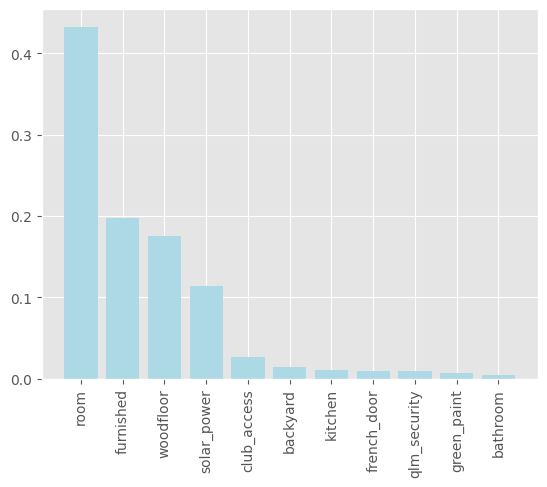

In [ ]:
keys = [k[1] for k in ranks_and_features ] # [::-1]
values = [k[0] for k in ranks_and_features ]#[::-1]
plt.xticks(rotation=90)
plt.bar(keys, values, color="lightblue")


**XGBOOST**

In [ ]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)

R-sqaured: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importances with XGBoost:
0.29977584 room
0.241706 woodfloor
0.2364698 furnished
0.11214046 solar_power
0.026595302 club_access
0.019723801 backyard
0.01696462 qlm_security
0.014970071 kitchen
0.011910282 french_door
0.011131189 green_paint
0.0086126365 bathroom


<BarContainer object of 11 artists>

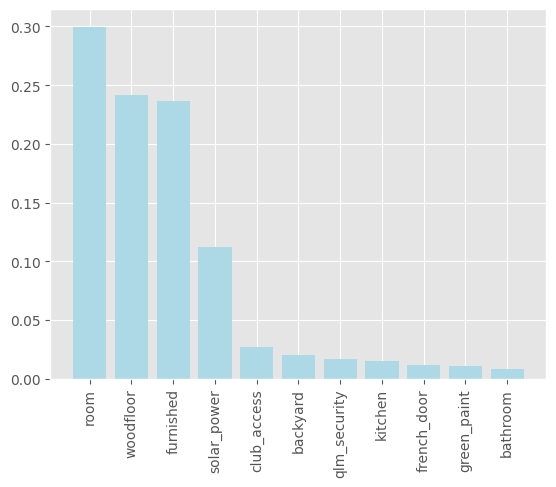

In [ ]:
keys = [k[1] for k in xgb_ranks_and_features ] # [::-1]
values = [k[0] for k in xgb_ranks_and_features ]#[::-1]
plt.xticks(rotation=90)
plt.bar(keys, values, color="lightblue")

In [ ]:
xgb_predicted = xgb_reg.predict(test_X)

In [ ]:
predicted

array([ 5346.5,  7729.9, 11476.9,  8770. , 11079.4, 11484.7, 11745. ,
        6989.1,  7798. ,  5906.9,  9090.8,  8433.3,  7096.4, 11278.6,
        7323.6,  9483.4,  8906.5, 12763. ,  9898.2,  6983.1,  8911.7,
        7412.2,  7116.7,  4260. , 10029.8,  7358.8,  7354.5,  9047.4,
        6829.8,  9278.1,  6613.2, 10052.9, 10549.2,  8286.5,  7664.2,
       10189.1,  9263.7, 11075.3,  9389.2, 13263.2,  6630.7,  5287.5,
        9844. ,  8892.2, 11630.9,  6114.8,  4359.6, 11421.6,  9570.2,
        5545.5, 11585.4, 10580.8,  4841.2,  7898.3, 13628.6,  9755.9,
        6186.3,  8462.2, 10074. ,  7791.4,  7825.8, 13495.4,  7316. ,
        8455. , 12567.1,  7133.3, 11293.2, 10588. ,  9983.7,  5515.4,
        8163.8, 12062.2,  4173.7,  6210.4,  9563.2,  8677.7,  6897.6,
       11208.1, 10961.6, 10675.1,  8833.3,  7448.9, 12052.2,  8122.4,
       11690.5,  6198.9,  8761.8,  8245.9,  6893.8,  8261.7,  7618.7,
       12111. , 11713.4,  7877.4,  6613.2, 11068.2, 11130. ,  8292. ,
        9197. ,  735

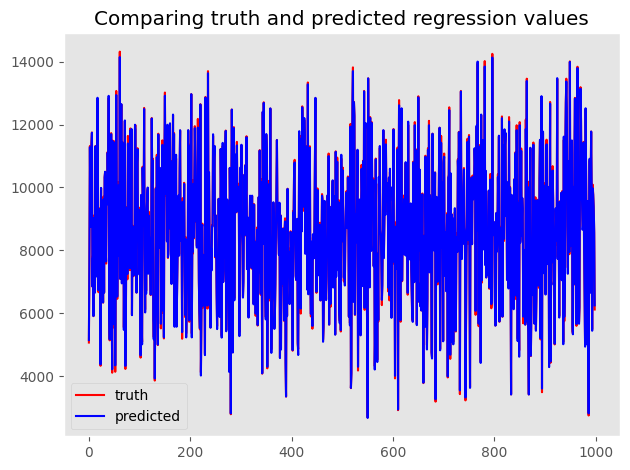

In [ ]:
make_plot(test_Y, xgb_predicted)

**MAE for the Algorithms**

Text(0.5, 1.0, 'MAE for the algorithms')

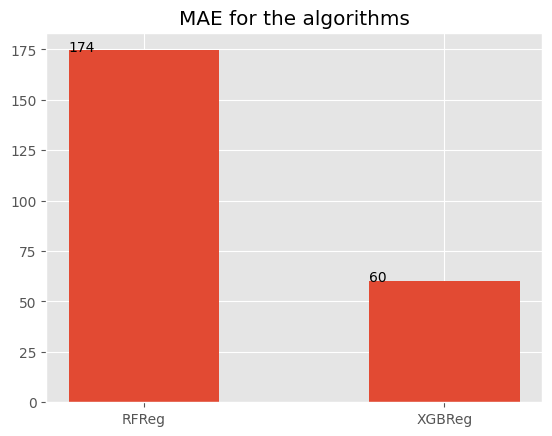

In [ ]:
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [rf_mae, xgb_mae]
labels = ["RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.5)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for the algorithms")